In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT 

%matplotlib inline

Welcome to JupyROOT 6.24/02


In [2]:
#Flag for laptop
Laptop = True

In [3]:
#Example for reading a tree from a single root-file
#inFile = ROOT.TFile.Open("1/GammaCaloMergedML_1540.root", "READ")
#tree = inFile.Get("00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Pio")

#Reading out a RDataFrame, works well for everything Int and float
#df = ROOT.RDataFrame("00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Pio", "1/GammaCaloMergedML_1540.root")
#ClusterType = df.AsNumpy(columns=["Cluster"])
#print(ClusterType)

In [4]:
#Creates a list filled with a TChain for every tree that should be read out
#The location of all root-files is needed as input, written in a file one path per line
#Takes a list of the names of all trees
#line[2:] to remove unnecessary characters and strip to remove all whitespaces from path to files
def create_chains(filelist, tree_name):
    f = open(filelist, "r")
    chainlist = []
    for name in tree_name:        
        chainlist.append(ROOT.TChain(name))
        
    
    print("Path to all root-files:")    
    for line in f:
        path = line.strip()
        print("{}".format(path))
        for i in range(len(tree_name)):
            chainlist[i].Add("{}".format(path))
            
    for i in range(len(tree_name)):
        print("Number of clusters in {}: {}".format(tree_name[i], chainlist[i].GetEntries()))
    f.close()
    return chainlist

In [5]:
#List with names of the trees
Tree_Name = ["00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Pio"
            ,"00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Eta"
            ,"00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Bck"]

In [6]:
if Laptop:
    Chain_laptop = create_chains("/home/jhonerma/Desktop/traintest/MergedMLPath.txt", Tree_Name)

Path to all root-files:
/home/jhonerma/ALICE_locAna_Output/pp_13TeV/sim/LHC17e5/000256417/LAOD/GammaCaloMergedML_1540.root
Number of clusters in 00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Pio: 161
Number of clusters in 00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Eta: 19
Number of clusters in 00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Bck: 50


In [7]:
if not Laptop:
    Chain_pi0 = create_chains("MergedMLPath_pi0.txt", Tree_Name)

In [8]:
if not Laptop:
    Chain_eta_bck = create_chains("MergedMLPath_etabck.txt", Tree_Name)

In [9]:
if Laptop:
    Chain_laptop[0].Show(0)
else:
    Chain_pi0[0].Show(0)

======> EVENT:0
 ClusterCellN    = 5
 Cluster         = 8.76692, 
                  0.201445, 0.415727, 1.25511, 0.220242
 ClusterType     = 3
 ClusterE        = 12.0986
 ClusterPt       = 10.967
 ClusterModuleNumber = 0, 
                  0, 0, 0, 0
 ClusterCol      = 15, 
                  14, 15, 14, 15
 ClusterRow      = 1, 
                  0, 0, 1, 2
 PartIsPrimary   = 0
 PartPID         = 111
 PartPt          = 10.3931
 PartE           = 11.4656
 PartEta         = 0.45047
 PartPhi         = 1.42696
 ClusterM02      = 0.253032
 PartM20         = 0.209339


In [10]:
def readout_chain(chain, part):
    nentries = chain.GetEntries()
    
    ClusterN = np.zeros((nentries), dtype=np.ubyte)
    _clusterN = np.zeros((1), dtype=np.ubyte)
    chain.SetBranchAddress("ClusterCellN", _clusterN)

    for i in range(nentries):
        chain.GetEntry(i)
        ClusterN[i] = _clusterN
    
    maxClusN = int(np.max(ClusterN))
    
    #arrays for the information
    Cluster = np.zeros((nentries, maxClusN), dtype=np.float32)
    ClusterType = np.zeros((nentries), dtype=np.ubyte)
    ClusterE = np.zeros((nentries), dtype=np.float32)
    ClusterPt = np.zeros((nentries), dtype=np.float32)
    ClusterModuleNumber = np.zeros((nentries, maxClusN), dtype=np.ubyte)
    ClusterCol = np.zeros((nentries, maxClusN), dtype=np.ubyte)
    ClusterRow = np.zeros((nentries, maxClusN), dtype=np.ubyte)
    ClusterM20 = np.zeros((nentries), dtype=np.float32)
    ClusterM02 = np.zeros((nentries), dtype= np.float32)
    PartE = np.zeros((nentries), dtype=np.float32)
    PartPt = np.zeros((nentries), dtype=np.float32)
    PartEta = np.zeros((nentries), dtype=np.float32)
    PartPhi = np.zeros((nentries), dtype=np.float32)
    PartIsPrimary = np.zeros((nentries), dtype=bool)
    PartPID = np.zeros((nentries), dtype=np.short)
    
    #Temp Variables to hold the values from each entry
    _Cluster = np.zeros((maxClusN), dtype=np.float32)
    _ClusterType = np.zeros((1), dtype=np.ubyte)
    _ClusterE = np.zeros((1), dtype=np.float32)
    _ClusterPt = np.zeros((1), dtype=np.float32)
    _ClusterModuleNumber = np.zeros((maxClusN), dtype=np.ubyte)
    _ClusterCol = np.zeros((maxClusN), dtype=np.ubyte)
    _ClusterRow = np.zeros((maxClusN), dtype=np.ubyte)
    _ClusterM20 = np.zeros((1), dtype=np.float32)
    _ClusterM02 = np.zeros((1), dtype= np.float32)
    _PartE = np.zeros((1), dtype=np.float32)
    _PartPt = np.zeros((1), dtype=np.float32)
    _PartEta = np.zeros((1), dtype=np.float32)
    _PartPhi = np.zeros((1), dtype=np.float32)
    _PartIsPrimary = np.zeros((1), dtype=bool)
    _PartPID = np.zeros((1), dtype=np.short)
   
    #Set up all the branchaddresses accordingly
    chain.SetBranchAddress("Cluster", _Cluster)
    chain.SetBranchAddress("ClusterType", _ClusterType)
    chain.SetBranchAddress("ClusterE", _ClusterE)
    chain.SetBranchAddress("ClusterPt", _ClusterPt)
    chain.SetBranchAddress("ClusterModuleNumber", _ClusterModuleNumber)
    chain.SetBranchAddress("ClusterCol", _ClusterCol)
    chain.SetBranchAddress("ClusterRow", _ClusterRow)
    chain.SetBranchAddress("ClusterM20", _ClusterM20)
    chain.SetBranchAddress("ClusterM02", _ClusterM02)
    chain.SetBranchAddress("PartE", _PartE)
    chain.SetBranchAddress("PartPt", _PartPt)
    chain.SetBranchAddress("PartEta", _PartEta)
    chain.SetBranchAddress("PartPhi", _PartPhi)
    if(part != "bck"):
        chain.SetBranchAddress("PartIsPrimary", _PartIsPrimary)
    chain.SetBranchAddress("PartPID", _PartPID)
    
    #loop over all entries
    for i in range(0, nentries ):
        chain.GetEntry(i)        
        Cluster[i, :ClusterN[i]] = _Cluster[:ClusterN[i]]
        ClusterType[i] = _ClusterType
        ClusterE[i] = _ClusterE
        ClusterPt[i] = _ClusterPt
        ClusterModuleNumber[i, :ClusterN[i]] = _ClusterModuleNumber[:ClusterN[i]]
        ClusterCol[i, :ClusterN[i]] = _ClusterCol[:ClusterN[i]]
        ClusterRow[i, :ClusterN[i]] = _ClusterRow[:ClusterN[i]]
        ClusterM20[i] = _ClusterM20
        ClusterM02[i] = _ClusterM02
        PartE[i] = _PartE
        PartPt[i] = _PartPt
        PartEta[i] = _PartEta
        PartPhi[i] = _PartPhi
        PartIsPrimary[i] = _PartIsPrimary
        PartPID[i] = _PartPID

    
    if(part == "bck"):
        dict_cluster = {  "ClusterN" : ClusterN, "Cluster" : Cluster, "ClusterType" : ClusterType, "ClusterE" : ClusterE
                        , "ClusterPt" : ClusterPt, "ClusterModuleNumber" : ClusterModuleNumber
                        , "ClusterCol" : ClusterCol, "ClusterRow" : ClusterRow, "ClusterM20" : ClusterM20
                        , "ClusterM02" : ClusterM02, "PartE" : PartE, "PartPt" : PartPt, "PartEta" : PartEta
                        , "PartPhi" : PartPhi, "PartPID" : PartPID}
    else:
        dict_cluster = {  "ClusterN" : ClusterN, "Cluster" : Cluster, "ClusterType" : ClusterType, "ClusterE" : ClusterE
                        , "ClusterPt" : ClusterPt, "ClusterModuleNumber" : ClusterModuleNumber
                        , "ClusterCol" : ClusterCol, "ClusterRow" : ClusterRow, "ClusterM20" : ClusterM20
                        , "ClusterM02" : ClusterM02, "PartE" : PartE, "PartPt" : PartPt, "PartEta" : PartEta
                        , "PartPhi" : PartPhi, "PartIsPrimary" : PartIsPrimary, "PartPID" : PartPID}
    
    return dict_cluster

In [11]:
#Read out all information from the trees and store it in a dict
if Laptop:
    pi0 = readout_chain(Chain_laptop[0], "pi0")
    eta = readout_chain(Chain_laptop[1], "eta")
    bck = readout_chain(Chain_laptop[2], "bck")
else:
    pi0 = readout_chain(Chain_pi0[0], "pi0")
    eta = readout_chain(Chain_eta_bck[1], "eta")
    bck = readout_chain(Chain_eta_bck[2], "bck")

In [12]:
pi0["ClusterE"]

array([12.098613 ,  7.4277916,  7.946416 , 13.157396 ,  7.219602 ,
        6.74003  ,  6.9938807,  7.224468 ,  6.5645995,  9.317995 ,
        7.339973 , 10.356463 ,  6.377685 , 12.665926 , 12.515856 ,
        7.180045 ,  6.816078 ,  9.261685 ,  6.9439087,  6.6542754,
        6.8737044,  7.4229445,  6.4813876,  6.8096623,  6.56331  ,
        8.295036 ,  6.36047  ,  8.252127 , 13.986094 ,  7.0002007,
        8.308306 ,  7.3407173,  8.456519 ,  7.3226643, 10.636455 ,
        8.669508 ,  8.693065 ,  7.2725897,  6.5239277,  8.765506 ,
        6.8922873,  9.420191 ,  6.5299373,  7.436996 ,  6.479261 ,
       11.150946 ,  9.514854 , 19.152145 ,  6.9066343,  7.1340384,
        6.9665546, 10.938621 ,  9.590712 , 11.25997  ,  7.2445893,
       11.169968 ,  7.6495714,  7.491139 ,  9.312957 ,  7.065371 ,
        7.0247884,  6.3994694,  6.5184536,  6.76662  ,  6.7037373,
        6.453463 ,  6.74738  ,  7.935038 , 14.468435 ,  6.8590393,
        7.058148 ,  6.425237 ,  8.97446  ,  6.93726  ,  8.3778

In [13]:
def print_stats(dict_list):
    for i, dic in enumerate(dict_list):
        print("==============={}===============".format(names[i]))
        print("Number of merged clusters: {}".format(len(dic["ClusterType"])))
        print()
        
        print("----------Clusters-----------")        
        print("Average Size of Clusters: {0:5.2f} \u00B1 {1:5.2f}".format(np.average(dic["ClusterN"]), np.std( dic["ClusterN"] )))
        print("Min Size of Clusters: {0:2d}   Max. Size of Clusters: {1:2d}".format(np.min( dic["ClusterN"]) ,np.max( dic["ClusterN"])) )
        #print("Average Cluster Width: {0:5.2f} \u00b1 {1:5.2f}".format(np.average()) )
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Cluster Energy", np.average(dic["ClusterE"]), np.std(dic["ClusterE"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Cluster Energy", np.min(dic["ClusterE"]), np.max(dic["ClusterE"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Cluster Pt", np.average(dic["ClusterPt"]), np.std(dic["ClusterPt"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Cluster Pt", np.min(dic["ClusterPt"]), np.max(dic["ClusterPt"])))
        print()
        
        print("----------Particles----------")
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Particle Energy", np.average(dic["PartE"]), np.std(dic["PartE"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Particle Energy", np.min(dic["PartE"]), np.max(dic["PartE"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Particle Pt", np.average(dic["PartPt"]), np.std(dic["PartPt"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Particle Pt", np.min(dic["PartPt"]), np.max(dic["PartPt"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f}".format("Particle Eta", np.average(dic["PartEta"]), np.std(dic["PartEta"])))
        print("Min. {0}: {1:5.2f}    Max. {0}: {2:5.2f}".format("Particle Eta", np.min(dic["PartEta"]), np.max(dic["PartEta"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f}".format("Particle Phi", np.average(dic["PartPhi"]), np.std(dic["PartPhi"])))
        print("Min. {0}: {1:5.2f}    Max. {0}: {2:5.2f}".format("Particle Phi", np.min(dic["PartPhi"]), np.max(dic["PartPhi"])))
        print()
        print()

In [47]:
def height_width(dic):
    width = []
    height = []
    for i in range(dic["ClusterCol"].shape[0]):
        _col = dic["ClusterCol"][i, :dic["ClusterN"][i]].copy()
        _row = dic["ClusterRow"][i, :dic["ClusterN"][i]].copy()
        _modnum = dic["ClusterModuleNumber"][i, :dic["ClusterN"][i]].copy()
        
        if not np.all( _modnum[0] == _modnum):
            ModNumDif = _modnum - np.min(_modnum)
            mask = np.where(ModNumDif == 1)            
            _col[mask] += 48
            print(_col)
            
            #print(dic["ClusterModuleNumber"][i, :dic["ClusterN"][i]])
            #print(dic["ClusterCol"][i, :dic["ClusterN"][i]] + 48 * mask)
            #print(dic["ClusterCol"][i, :dic["ClusterN"][i]])
        
    
        mincol = np.min(_col)
        maxcol = np.max(_col)
        minrow = np.min(_row)
        maxrow = np.max(_row)
        width.append(maxcol - mincol + 1)
        height.append(maxrow - minrow + 1)
    print(dic["ClusterCol"][30:31])
    print(dic["ClusterRow"][30:31])
    print(dic["ClusterModuleNumber"][30:31])
    print(dic["Cluster"][30:31])
    print(width)
    print(height)

In [48]:
height_width(pi0)

[ 46  44  45  45  45  47  47  46  46 192  47  47]
[192 192  47 193 193 192]
[[ 46  44  45  45  45  47  47  46  46 192  47  47   0]]
[[14 13 15 14 13 12 13 13 15 15 15 14  0]]
[[8 8 8 8 8 8 8 8 8 9 8 8 0]]
[[3.6583977  0.16347064 0.18091793 0.23579499 0.37021783 0.29191002
  0.49887544 0.51983917 0.3454706  0.12508774 0.353191   0.6681662
  0.        ]]
[2, 2, 2, 3, 3, 2, 4, 2, 2, 3, 2, 3, 2, 3, 2, 4, 1, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 149, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 4, 3, 2, 2, 2, 2, 2, 3, 2, 2, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 147, 4, 3, 2, 2, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 4, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 3, 2, 3, 2]
[3, 2, 3, 4, 3, 3, 4, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 4, 3, 2, 3, 3, 4, 2, 2, 4, 3, 3, 3, 5, 2, 3, 3, 2, 3, 4, 2, 2, 4, 2, 3, 2, 2, 3, 

In [31]:
x = np.array([1 ,1 ,0 ,1 ,1 ,1])
test = np.array([ 0  ,0 ,47  ,1  ,1  ,0])
y = np.where(x==3)
test[y] += 48
test

array([ 0,  0, 47,  1,  1,  0])

In [73]:
labels = [r"$\pi_0$", r"$\eta$","Bck"]
dicts = [pi0, eta, bck]
names = ['\u03C0'+'0', '\u03B7', 'Bck']

In [74]:
print_stats(dicts)

===============π0===============
Number of merged clusters: 161

----------Clusters-----------
Average Size of Clusters:  5.23 ±  1.92
Min Size of Clusters:  2   Max. Size of Clusters: 13
Average Cluster Energy:  8.81 ±  2.92 GeV
Min. Cluster Energy:  6.36 GeV   Max. Cluster Energy: 20.86 GeV
Average Cluster Pt:  8.19 ±  2.74 GeV
Min. Cluster Pt:  5.51 GeV   Max. Cluster Pt: 19.47 GeV

----------Particles----------
Average Particle Energy:  8.33 ±  2.79 GeV
Min. Particle Energy:  6.00 GeV   Max. Particle Energy: 19.90 GeV
Average Particle Pt:  7.74 ±  2.62 GeV
Min. Particle Pt:  5.20 GeV   Max. Particle Pt: 18.57 GeV
Average Particle Eta:  0.02 ±  0.39
Min. Particle Eta: -0.60    Max. Particle Eta:  0.60
Average Particle Phi:  3.03 ±  1.27
Min. Particle Phi:  1.42    Max. Particle Phi:  5.55


===============η===============
Number of merged clusters: 19

----------Clusters-----------
Average Size of Clusters:  4.63 ±  1.38
Min Size of Clusters:  3   Max. Size of Clusters:  8
Average C

In [17]:
def plot_energy(dict_list, labels):
    plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    for i, dic in enumerate(dict_list):
        ax.hist(dic["ClusterE"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Merged Cluster Energy in 13TeV pp-Collisions")
    ax.set_xlabel("Energy [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/clusterenergy.pdf", dpi=300, bbox_inches='tight')
    
def plot_energy_cltype(dict_list, labels):
    plt.rcParams['figure.figsize'] = [48/2.54, 16/2.54]
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["ClusterE"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("Energy [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(100,3000,"ClusterType {}".format(i+1))
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle(" Merged Cluster Energy in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/clusterenergy_type.pdf", dpi=300, bbox_inches='tight')

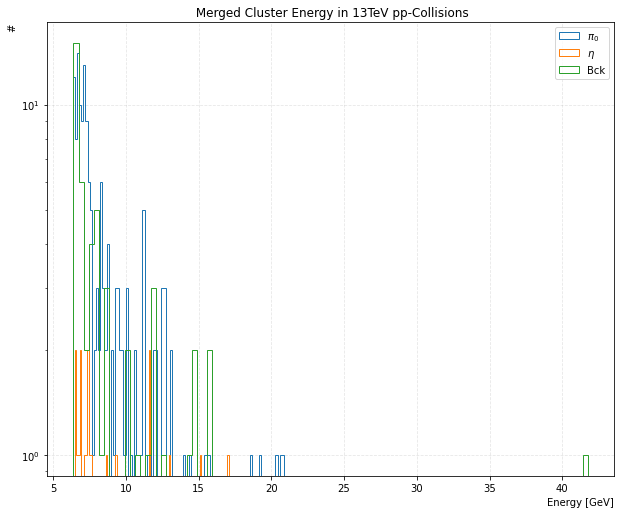

In [18]:
plot_energy(dicts, labels)

π0 ClusterType 1: 34.0
η ClusterType 1: 0.0
π0 ClusterType 2: 97.0
η ClusterType 2: 16.0
π0 ClusterType 3: 30.0
η ClusterType 3: 3.0


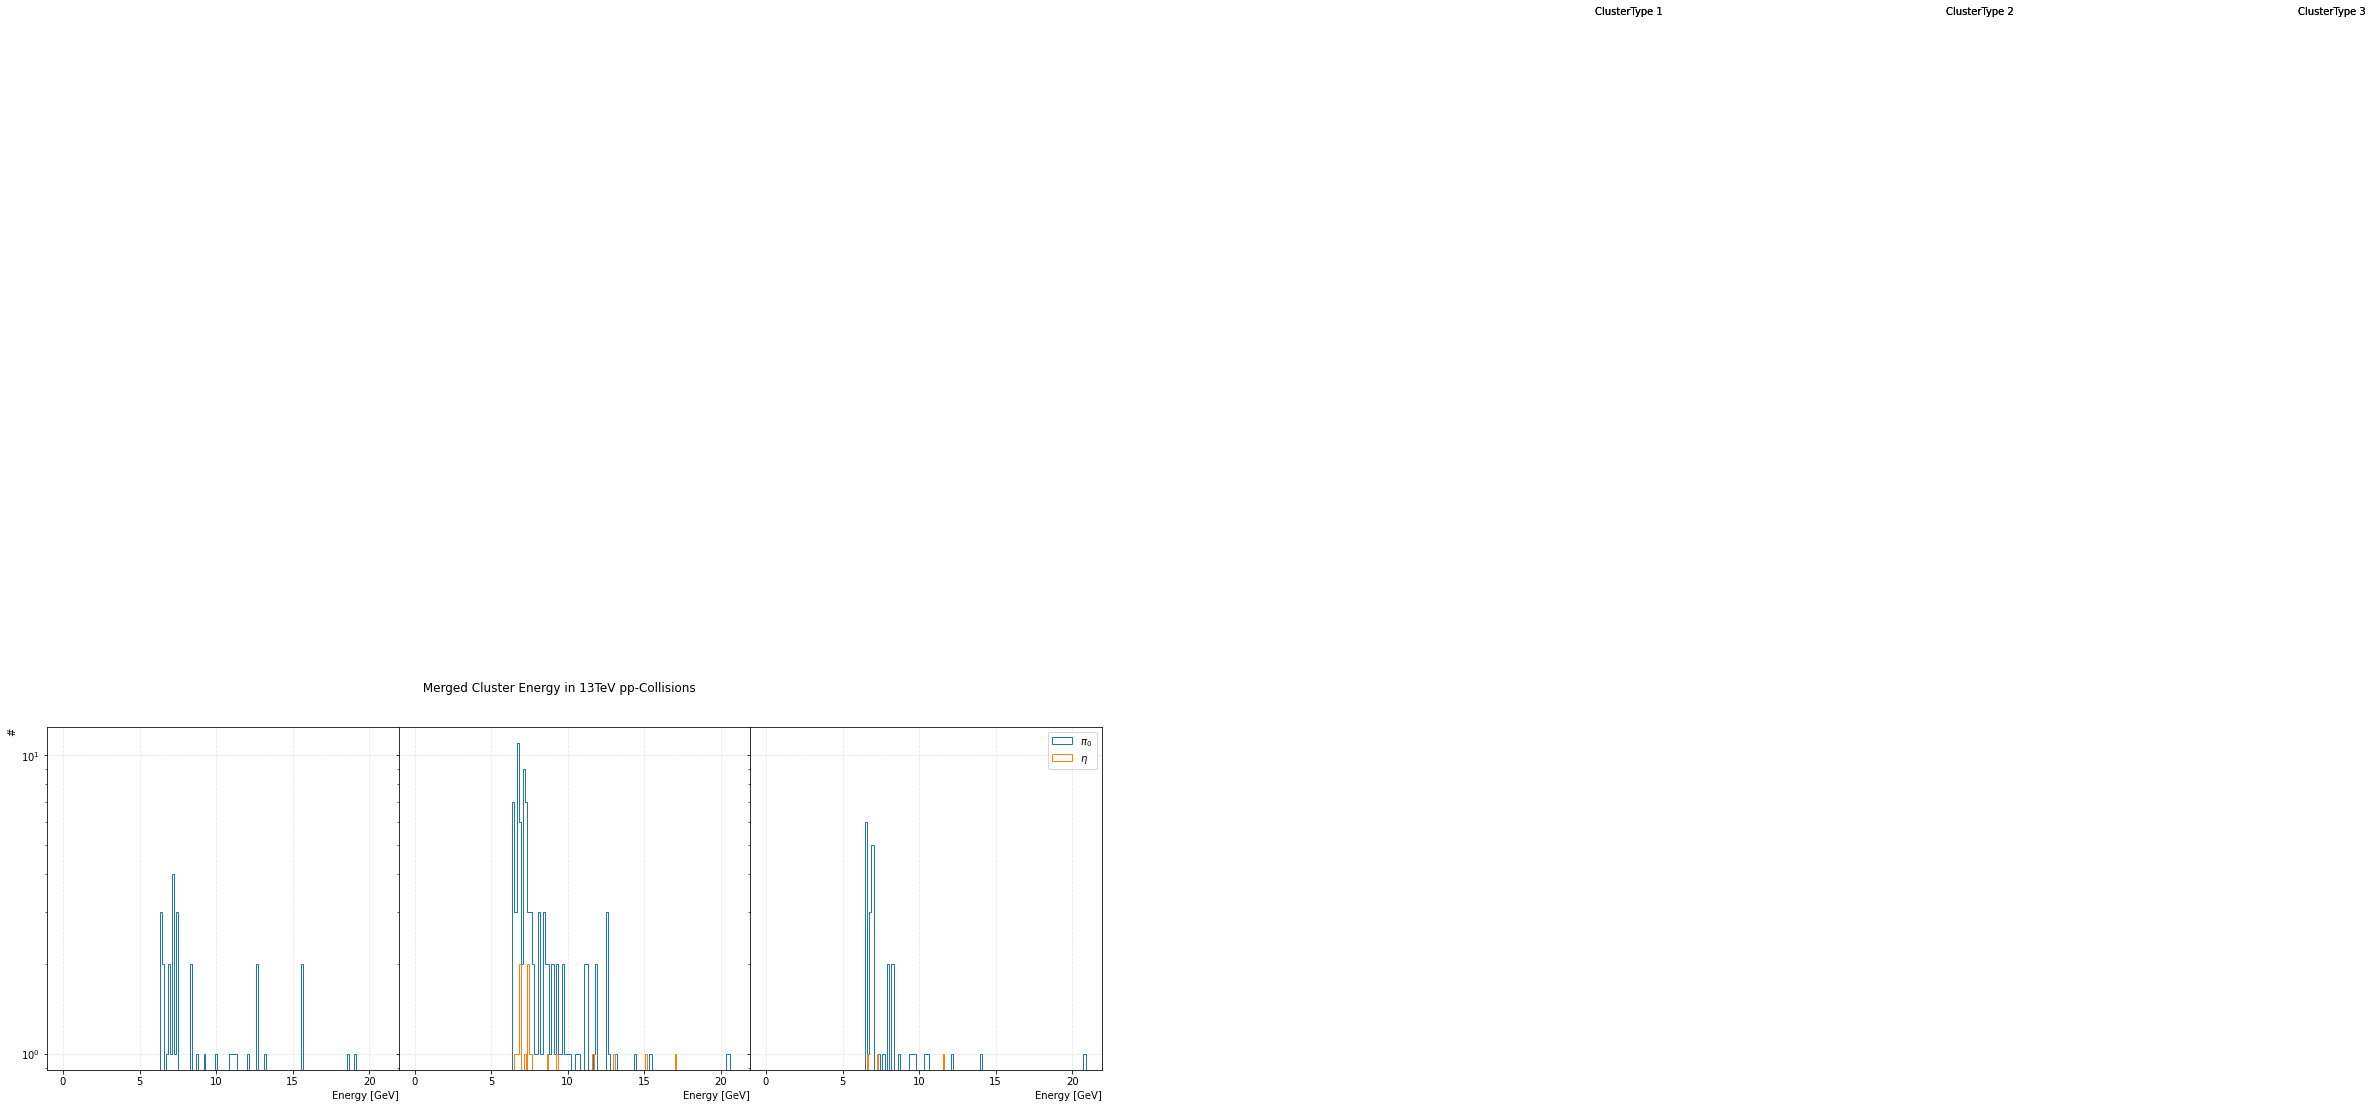

In [19]:
plot_energy_cltype(dicts[0:2], labels[0:2])

In [20]:
def plot_pt(dict_list, labels):
    plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    for i, dic in enumerate(dict_list):
        ax.hist(dic["ClusterPt"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Merged Cluster Pt in 13TeV pp-Collisions")
    ax.set_xlabel("pt [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/clusterpt.pdf", dpi=300, bbox_inches='tight')
    
def plot_pt_cltype(dict_list, labels):
    plt.rcParams['figure.figsize'] = [48/2.54, 16/2.54]
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["ClusterPt"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("pt [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(100,3000,"ClusterType {}".format(i+1))
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle(" Merged Cluster Pt in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/clusterpt_type.pdf", dpi=300, bbox_inches='tight')

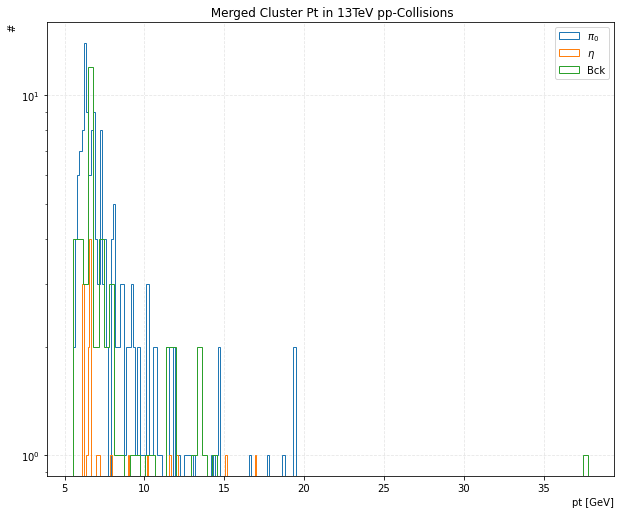

In [21]:
plot_pt(dicts, labels)

π0 ClusterType 1: 34.0
η ClusterType 1: 0.0
π0 ClusterType 2: 97.0
η ClusterType 2: 16.0
π0 ClusterType 3: 30.0
η ClusterType 3: 3.0


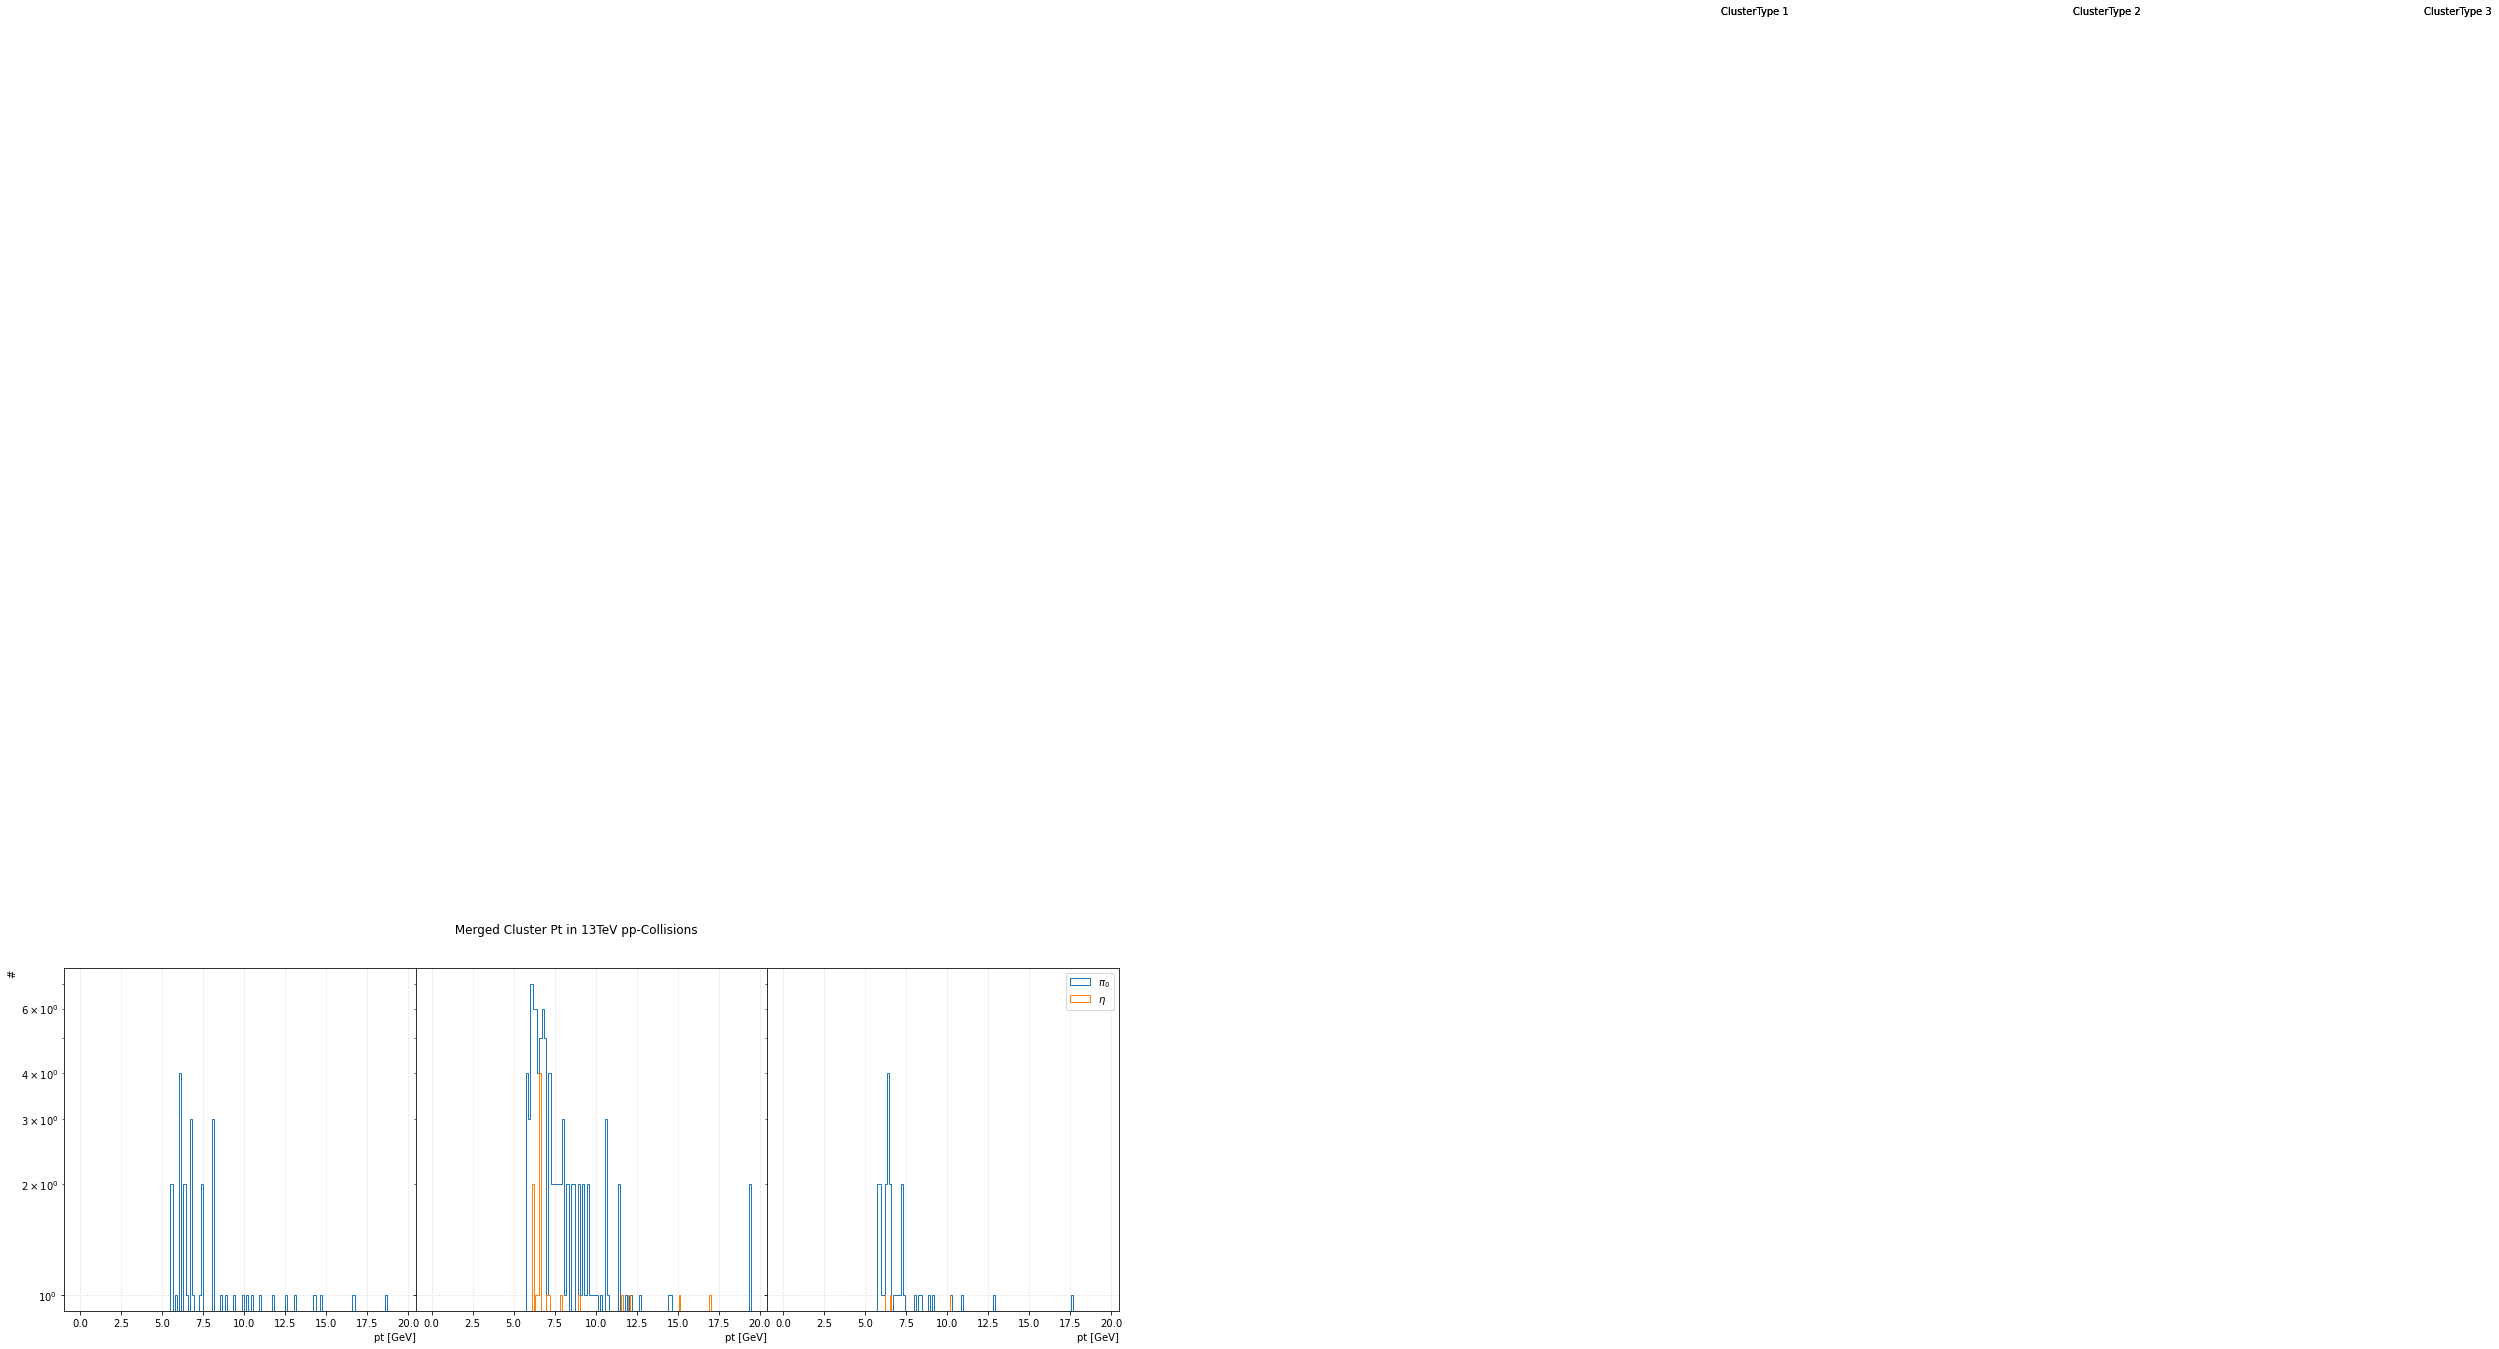

In [22]:
plot_pt_cltype(dicts[0:2], labels[0:2])

In [23]:
def plot_part_e(dict_list, labels):
    plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    for i, dic in enumerate(dict_list):
        ax.hist(dic["PartE"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Particle energie in 13TeV pp-Collisions")
    ax.set_xlabel("Energy [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/parte.pdf", dpi=300, bbox_inches='tight')
    
def plot_part_e_cltype(dict_list, labels):
    plt.rcParams['figure.figsize'] = [48/2.54, 16/2.54]
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["PartE"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("Energy [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(100,3000,"ClusterType {}".format(i+1))
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle("Particle energy in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/parte_type.pdf", dpi=300, bbox_inches='tight')

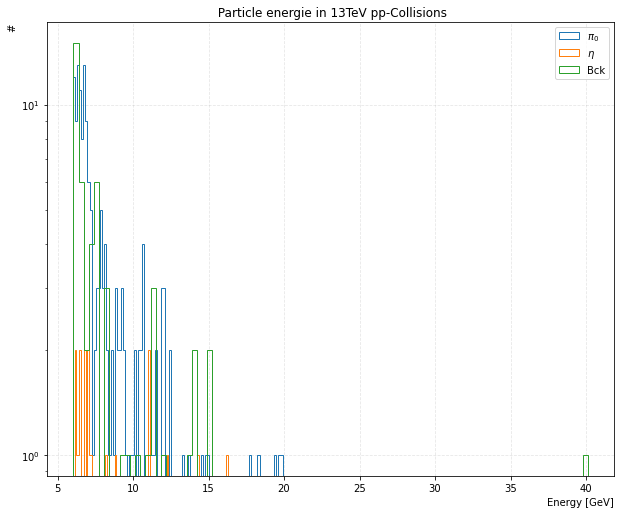

In [24]:
plot_part_e(dicts, labels)

π0 ClusterType 1: 34.0
η ClusterType 1: 0.0
π0 ClusterType 2: 97.0
η ClusterType 2: 16.0
π0 ClusterType 3: 30.0
η ClusterType 3: 3.0


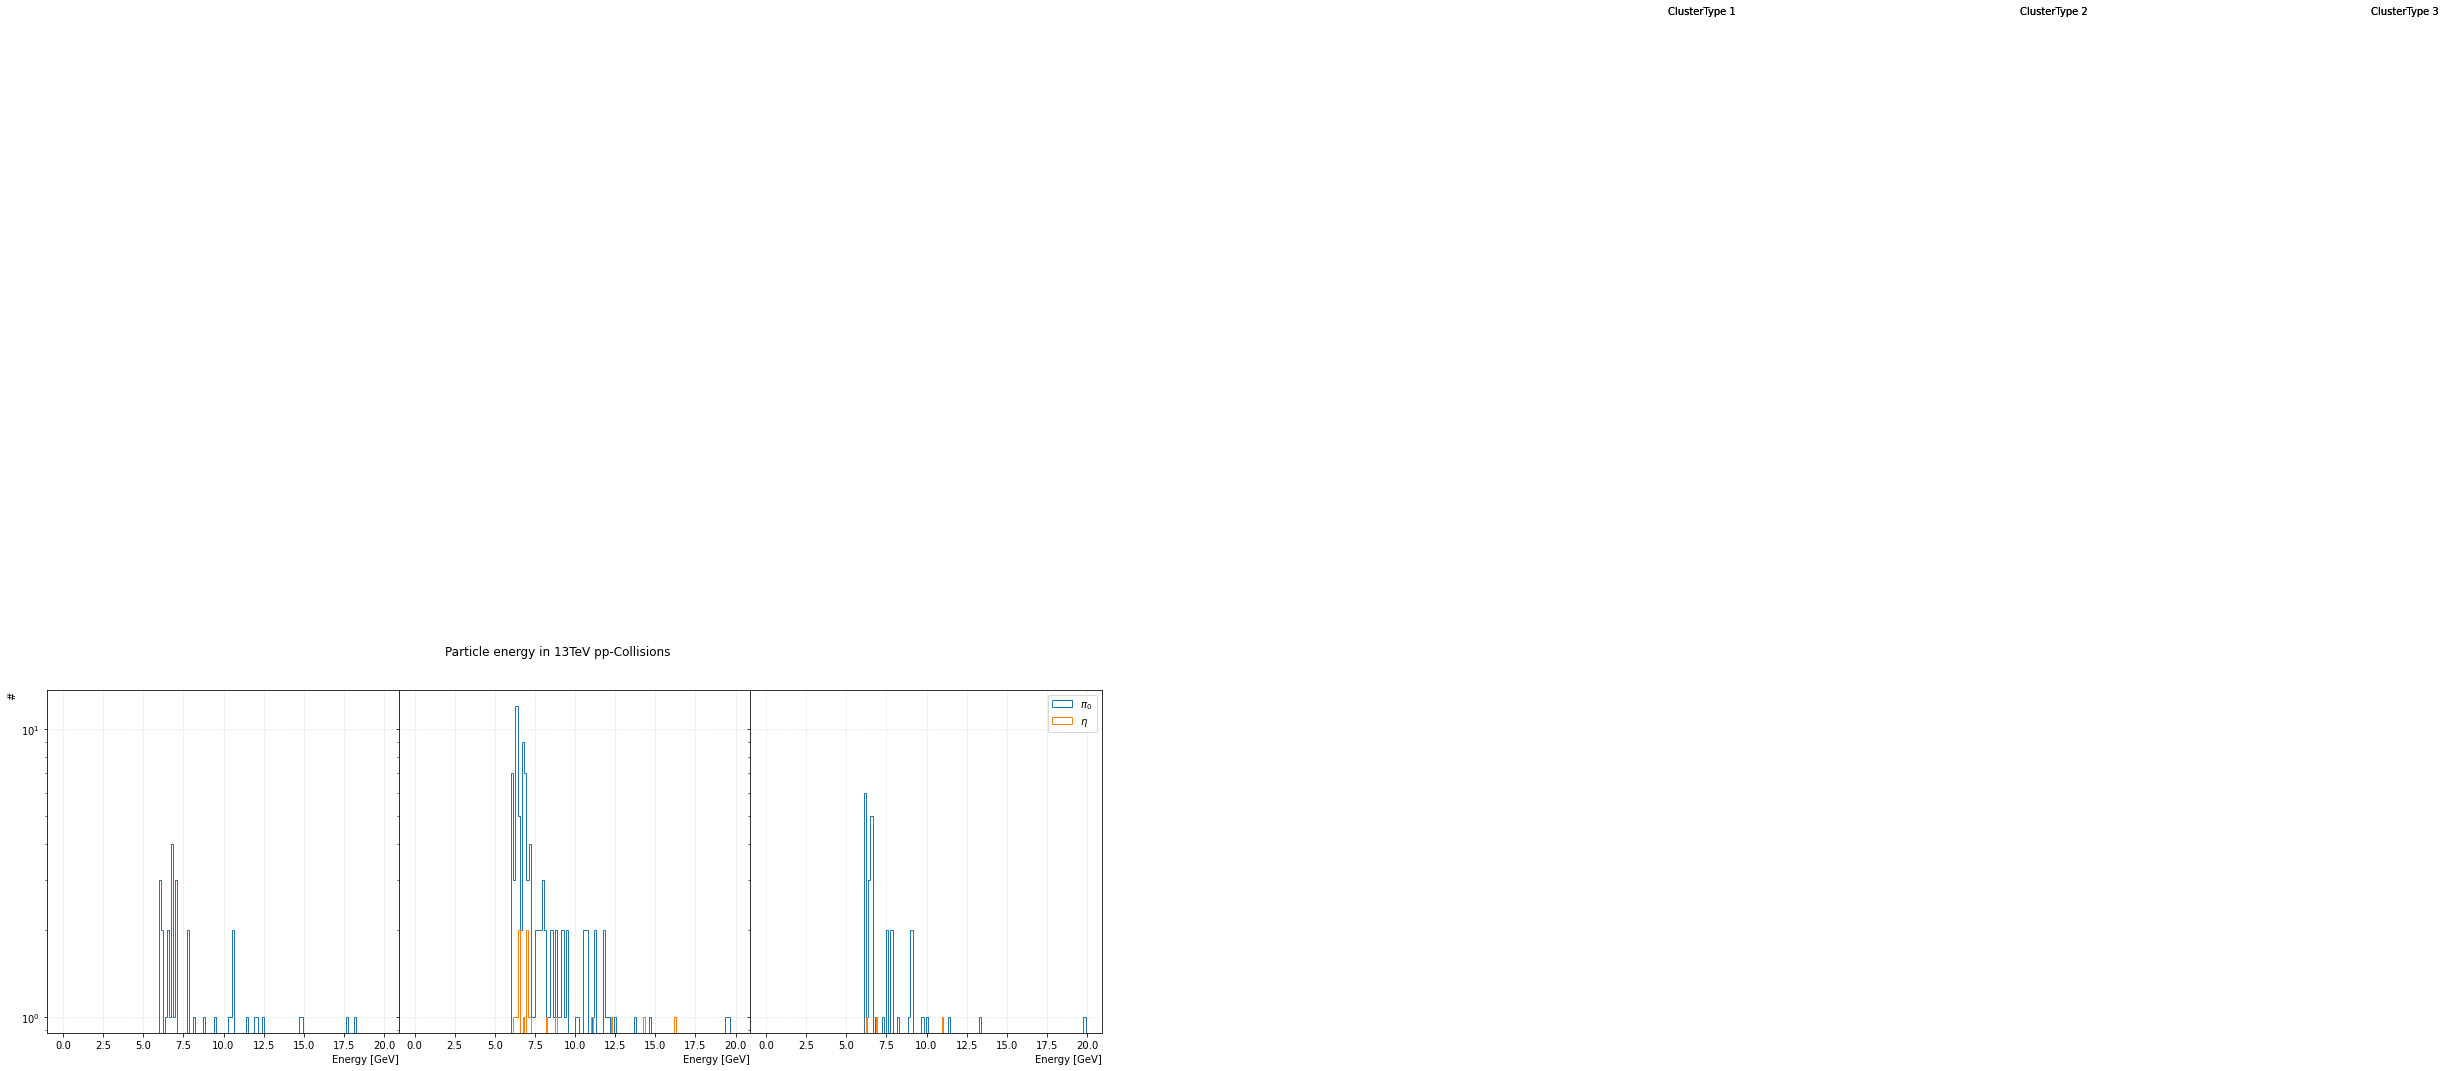

In [25]:
plot_part_e_cltype(dicts[0:2], labels[0:2])

In [26]:
def plot_part_pt(dict_list, labels):
    plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    for i, dic in enumerate(dict_list):
        ax.hist(dic["PartPt"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Particle pt in 13TeV pp-Collisions")
    ax.set_xlabel("pt [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/partpt.pdf", dpi=300, bbox_inches='tight')
    
def plot_part_pt_cltype(dict_list, labels):
    plt.rcParams['figure.figsize'] = [48/2.54, 16/2.54]
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["PartPt"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("pt [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(100,3000,"ClusterType {}".format(i+1))
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle("Particle pt in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/partpt_type.pdf", dpi=300, bbox_inches='tight')

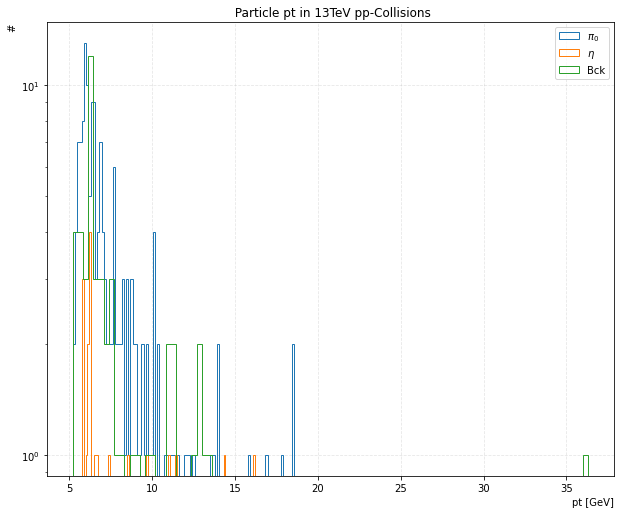

In [27]:
plot_part_pt(dicts, labels)

π0 ClusterType 1: 34.0
η ClusterType 1: 0.0
π0 ClusterType 2: 97.0
η ClusterType 2: 16.0
π0 ClusterType 3: 30.0
η ClusterType 3: 3.0


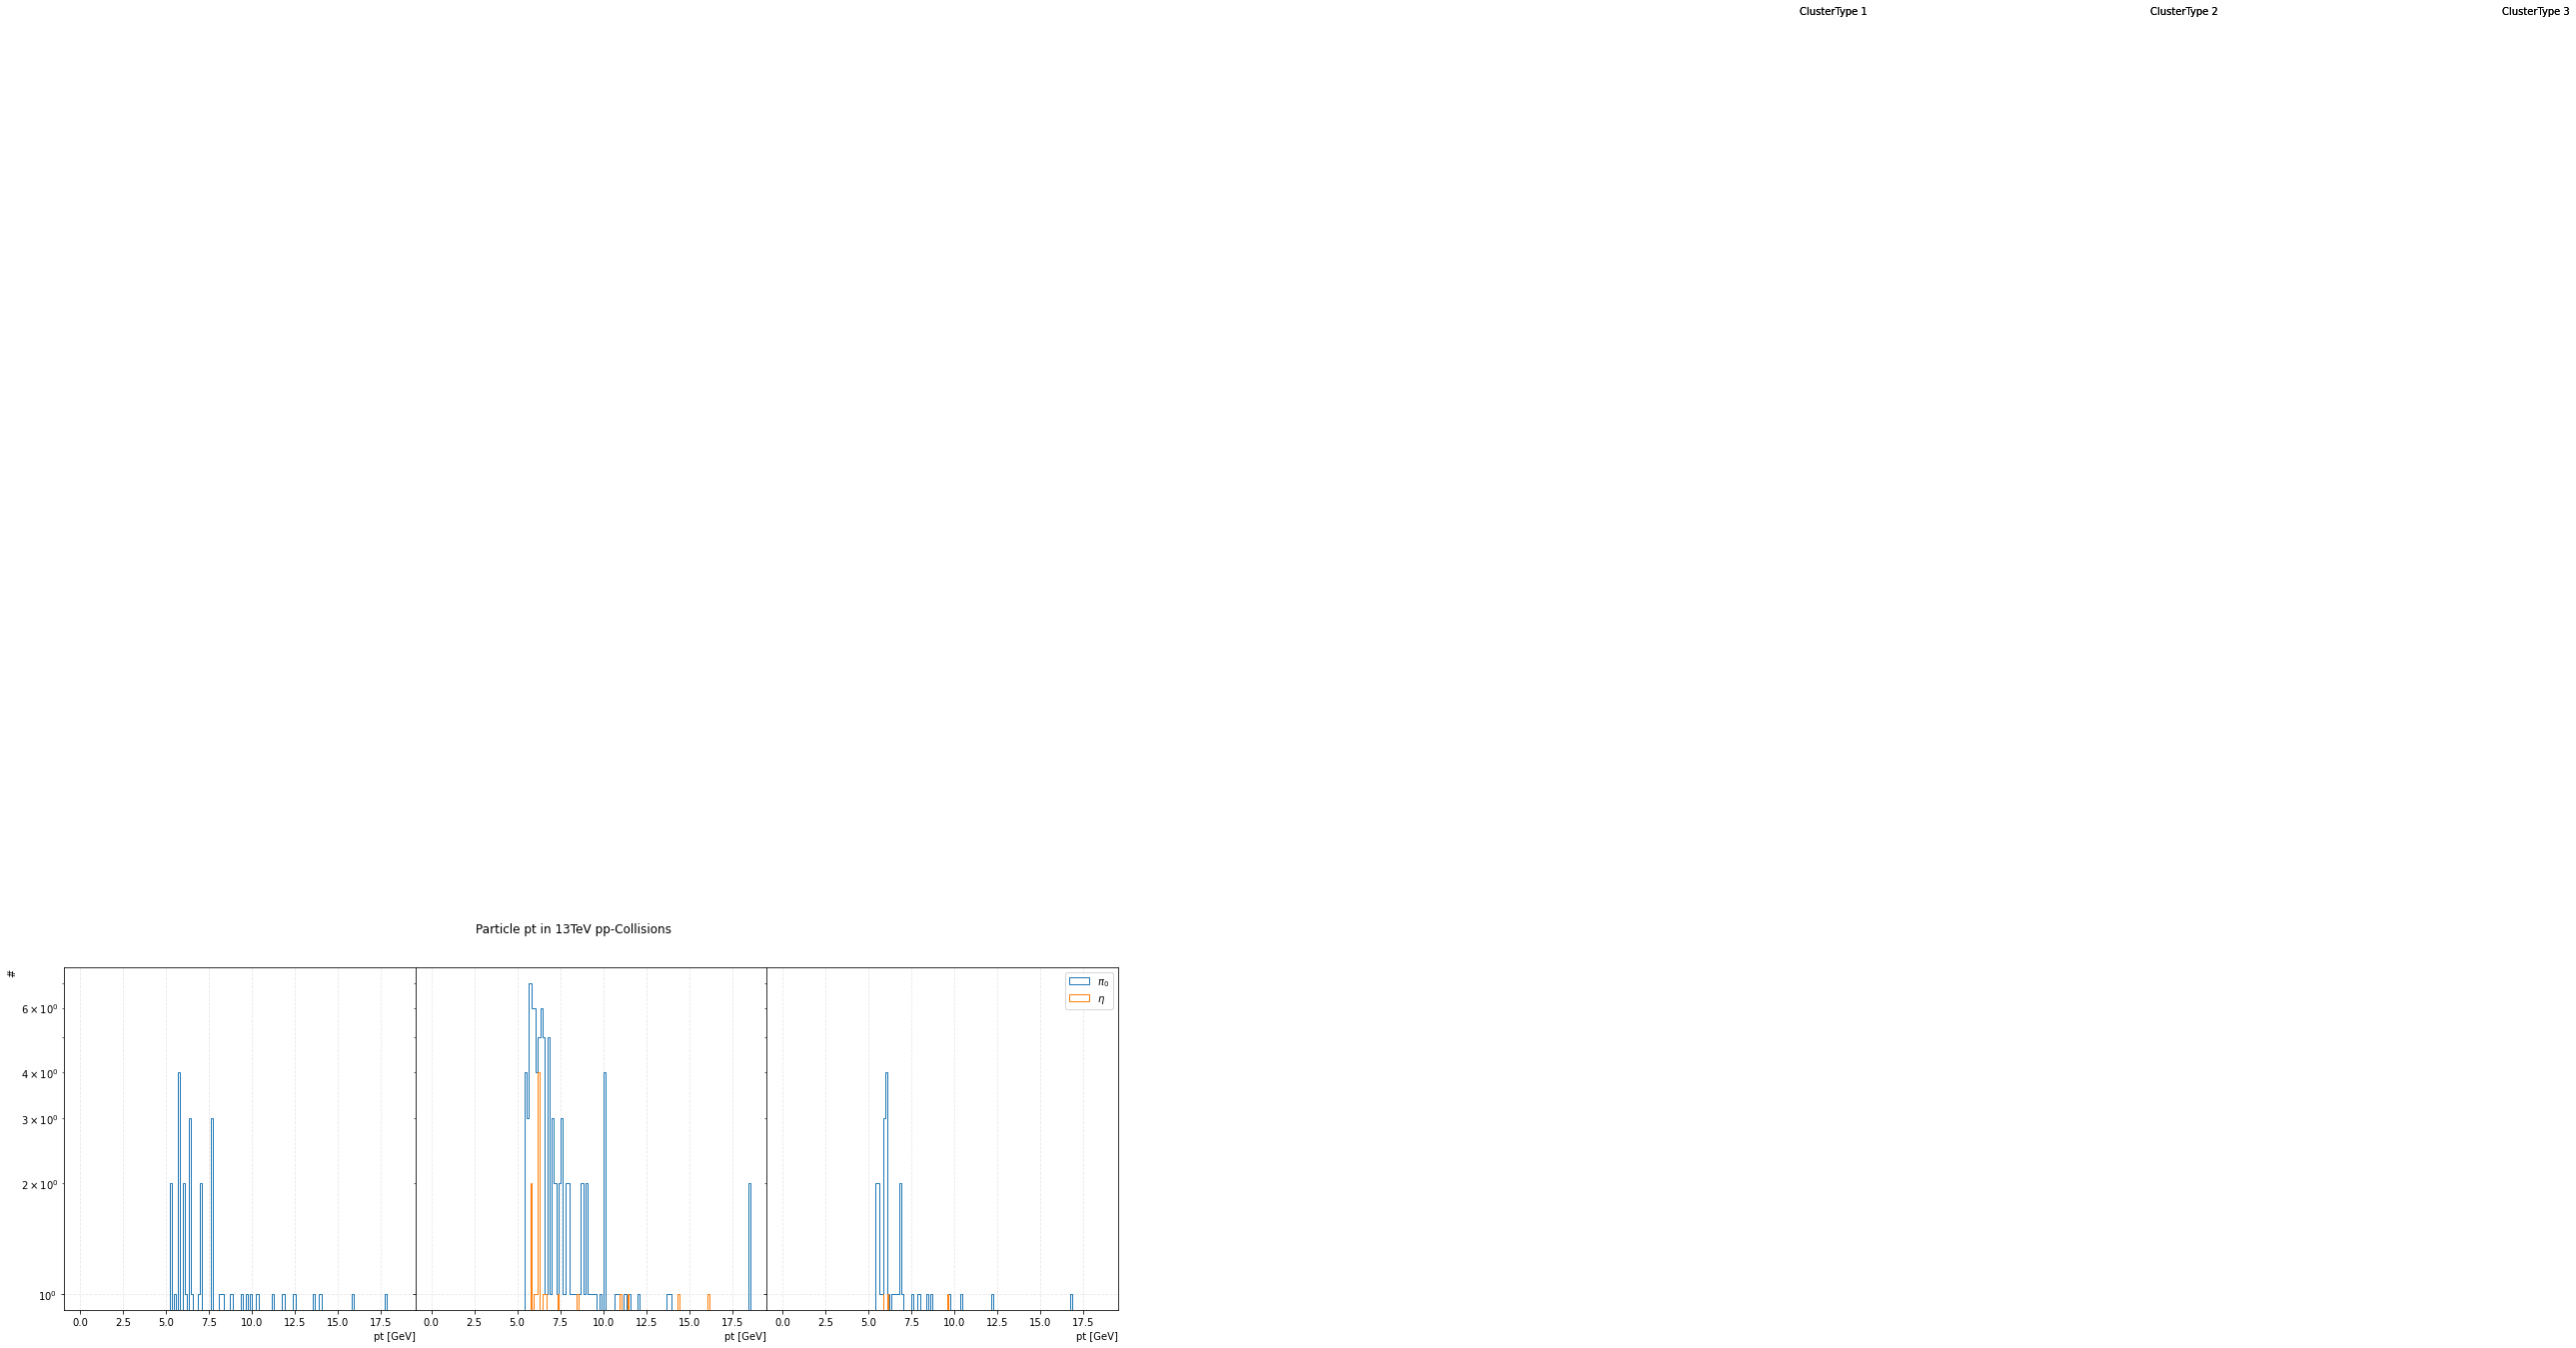

In [28]:
plot_part_pt_cltype(dicts[0:2], labels[0:2])

In [29]:
def plot_comp_e(dict_list, labels):
    plt.rcParams['figure.figsize'] = [48/2.54, 16/2.54]
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    for i in range(3):
        ax = axs[i]
        dic = dict_list[i]
        ax.hist(dic["ClusterE"], bins=100, histtype='step', log=True, label=labels[i])
        ax.hist(dic["PartE"], bins=100, histtype='step', log=True, label=labels[i])
        ax.set_xlabel("pt [GeV]", loc='right')
        if(i == 0):
            ax.set_ylabel("#", loc='top')
        ax.grid(b=True, linestyle='--', alpha=0.3)
        ax.text(100,3000,"{}".format(labels[i]))
        
            
    plt.suptitle("Particle pt in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/comp_e.pdf", dpi=300, bbox_inches='tight')

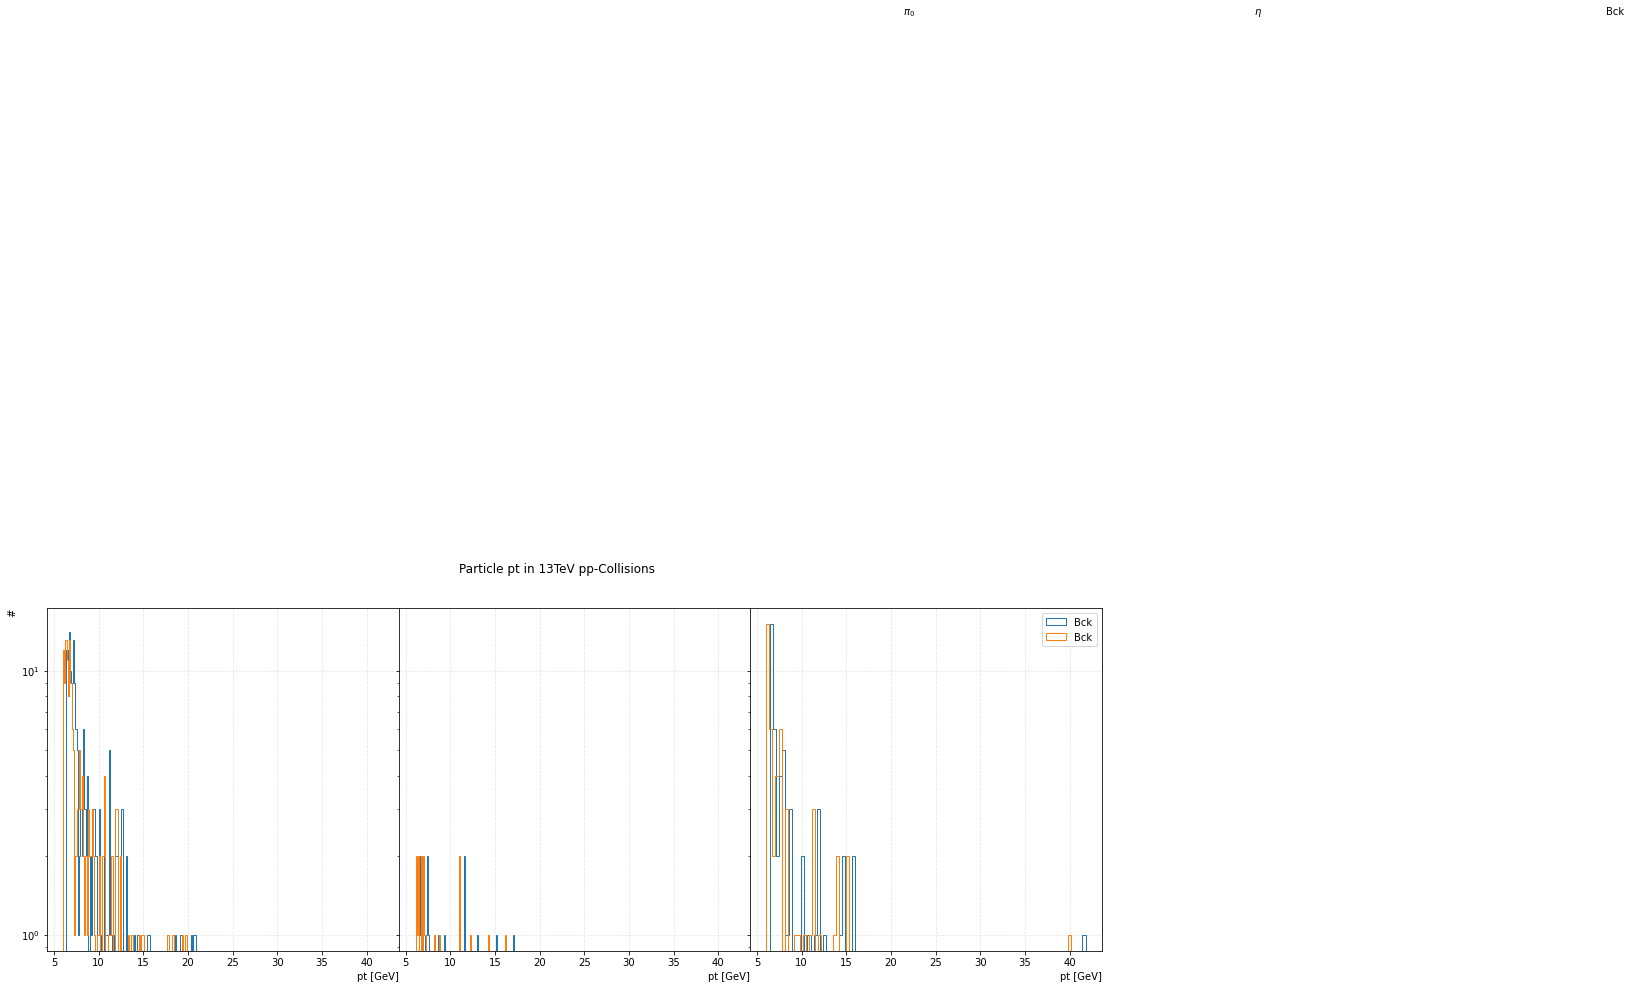

In [30]:
plot_comp_e(dicts, labels)

In [31]:
np.savez_compressed('Data-Raw/pi0', Cluster=pi0["Cluster"], ClusterType=pi0["ClusterType"], ClusterE=pi0["ClusterE"]
                   ,ClusterPt=pi0["ClusterPt"], ClusterModuleNumber=pi0["ClusterModuleNumber"]
                   ,ClusterCol=pi0["ClusterCol"], ClusterRow=pi0["ClusterRow"], ClusterM20=pi0["ClusterM20"]
                   ,ClusterM02=pi0["ClusterM02"], PartE=pi0["PartE"], PartPt=pi0["PartPt"], PartEta=pi0["PartEta"]
                  ,PartPhi=pi0["PartPhi"], PartIsPrimary=pi0["PartIsPrimary"], PartPID=pi0["PartPID"])

np.savez_compressed('Data-Raw/eta', Cluster=eta["Cluster"], ClusterType=eta["ClusterType"], ClusterE=eta["ClusterE"]
                   ,ClusterPt=eta["ClusterPt"], ClusterModuleNumber=eta["ClusterModuleNumber"]
                   ,ClusterCol=eta["ClusterCol"], ClusterRow=eta["ClusterRow"], ClusterM20=eta["ClusterM20"]
                   ,ClusterM02=eta["ClusterM02"], PartE=eta["PartE"], PartPt=eta["PartPt"], PartEta=eta["PartEta"]
                   ,PartPhi=eta["PartPhi"], PartIsPrimary=eta["PartIsPrimary"], PartPID=eta["PartPID"])

np.savez_compressed('Data-Raw/bck', Cluster=bck["Cluster"], ClusterType=bck["ClusterType"], ClusterE=bck["ClusterE"]
                   ,ClusterPt=bck["ClusterPt"], ClusterModuleNumber=bck["ClusterModuleNumber"]
                   ,ClusterCol=bck["ClusterCol"], ClusterRow=bck["ClusterRow"], ClusterM20=bck["ClusterM20"]
                   ,ClusterM02=bck["ClusterM02"], PartE=bck["PartE"], PartPt=bck["PartPt"], PartEta=bck["PartEta"]
                   ,PartPhi=bck["PartPhi"], PartPID=bck["PartPID"])